<ipython-input-7-34bbd2e7f258>:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


📊 Model Evaluation:
Mean Absolute Error (MAE): 153.15
Root Mean Squared Error (RMSE): 177.25
R² Score: -6.9380


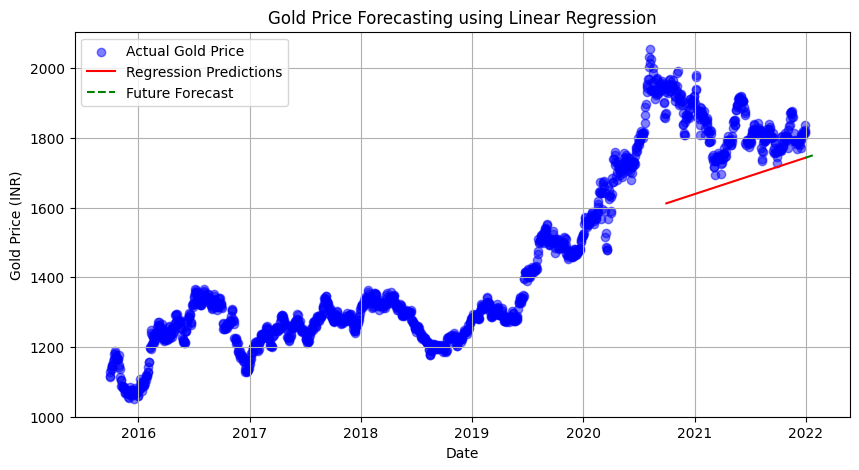

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("/content/gold_data.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

gold_price_col = "Price"

df = df[(df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2021)]

df.set_index('Date', inplace=True)

df['Date_Ordinal'] = df.index.map(lambda x: x.toordinal())

X = df[['Date_Ordinal']]
y = df[gold_price_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

future_dates = pd.date_range(start=df.index[-1], periods=30, freq='D')  # Predict next 30 days
future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)

plt.figure(figsize=(10, 5))
plt.scatter(df.index, df[gold_price_col], label="Actual Gold Price", color='blue', alpha=0.5)
plt.plot(df.index[-len(y_test):], y_pred, label="Regression Predictions", color='red')
plt.plot(future_dates, future_predictions, label="Future Forecast", color='green', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.title("Gold Price Forecasting using Linear Regression")
plt.legend()
plt.grid()
plt.show()
